In [1]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.linear_model import Perceptron
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import cross_val_score

# Function for plotting graphs

In [2]:
#function to define plots
def define_plot(clf, X, y, title, index, dims):
    plt.subplot(dims[0], dims[1], index)
    plot_decision_regions(X=X.values, y=y.values, clf=clf, legend=2)
    plt.xlabel(X.columns[0], size=14)
    plt.ylabel(X.columns[1], size=14)
    plt.title(title, size=16)
    plt.axvline(x=0, color='black', linestyle='--')
    plt.axhline(y=0, color='black', linestyle='--')

# Functions for labeling data and creating data

In [3]:
#training data uniform 
def uniform_data(data_size):
    return np.random.uniform(low=-5, high=5, size=data_size)

In [4]:
### Simple perceptron And with random data
### add in noise
def and_label_with_noise(df):
    rtn = []
    offset = 1
    for i in range(df.shape[0]):
        x = df['X'][i]
        y = df['Y'][i]
        if((x<offset and x>-offset) and (y<offset and y>-offset)):
            if(random.randint(0,10) <= 5):
                if df['X'][i] >= df['Y'][i]:
                    rtn.append(-1)
                else:
                    rtn.append(1)
            else:
                if df['X'][i] >= df['Y'][i]:
                    rtn.append(1)
                else:
                    rtn.append(-1)
                    
        else:
            if df['X'][i] >= df['Y'][i]:
                rtn.append(1)
            else:
                rtn.append(-1)
    return rtn

In [5]:
### Simple perceptron And with random data
def and_label(df):
    rtn = []
    for i in range(df.shape[0]):
        if df['X'][i] >= df['Y'][i]:
            rtn.append(1)
        else:
            rtn.append(-1)
    return rtn

In [6]:
def xor_label(df):
    rtn = []
    for i in range(df.shape[0]):
        if (df['X'][i] >= 0 and df['Y'][i] < 0) or (df['X'][i] < 0 and df['Y'][i] >= 0):
            rtn.append(1)
        else:
            rtn.append(-1)
    return rtn

# Testing svm -c softmargin values with the linear kernel

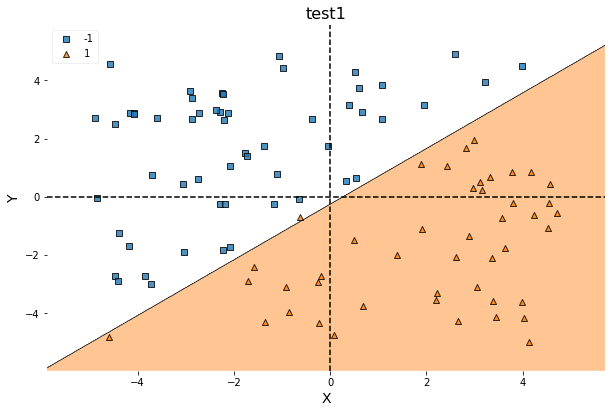

In [24]:
x_1 = uniform_data(100)
y_1 = uniform_data(100)

x_2 = uniform_data(200)
y_2 = uniform_data(200)

and_df_train = pd.DataFrame({'X': x_1,
                       'Y': y_1})
and_df_train['Label'] = and_label_with_noise(and_df_train)

X = and_df_train[['X', 'Y']]
y = and_df_train['Label']


and_df_test = pd.DataFrame({'X': x_2,
                       'Y': y_2})
and_df_test['Label'] = and_label(and_df_test)

X_test = and_df_test[['X', 'Y']]
y_test = and_df_test['Label']

clf = svm.SVC(kernel='linear', C = 1.0)
clf.fit(X.values, y.values)
plt.figure(figsize=(22,14))
dims = [2,2]
define_plot(clf, X, y, "test1", 1, dims)

In [50]:
clf_1 = svm.SVC(kernel='linear', C = 1.0)
clf_2 = svm.SVC(kernel='linear', C = 0.01)
clf_3 = svm.SVC(kernel='linear', C = 0.005)
clf_4 = svm.SVC(kernel='linear', C = 0.0005)

In [51]:
scores_1 = cross_val_score(clf_1, X.values, y.values, cv=5)
scores_2 = cross_val_score(clf_2, X.values, y.values, cv=5)
scores_3 = cross_val_score(clf_3, X.values, y.values, cv=5)
scores_4 = cross_val_score(clf_4, X.values, y.values, cv=5)
print(scores_1)
print("svm-c linear soft margin cross validation mean, 95% confidence interval")
print("linear c-soft margin value of 1.00: %0.2f, (+/- %0.2f)" % (scores_1.mean(), scores_1.std() * 2)) 
print("linear c-soft margin value of 0.001: %0.2f, (+/- %0.2f)" % (scores_2.mean(), scores_2.std() * 2)) 
print("linear c-soft margin value of 0.0007: %0.2f, (+/- %0.2f)" % (scores_3.mean(), scores_3.std() * 2)) 
print("linear c-soft margin value of 0.0005: %0.2f, (+/- %0.2f)" % (scores_4.mean(), scores_4.std() * 2)) 

[1.   0.95 1.   0.95 1.  ]
svm-c linear soft margin cross validation mean, 95% confidence interval
linear c-soft margin value of 1.00: 0.98, (+/- 0.05)
linear c-soft margin value of 0.001: 0.98, (+/- 0.05)
linear c-soft margin value of 0.0007: 0.97, (+/- 0.05)
linear c-soft margin value of 0.0005: 0.55, (+/- 0.00)


In [52]:
clf_1.fit(X.values, y.values)
clf_2.fit(X.values, y.values)
clf_3.fit(X.values, y.values)
clf_4.fit(X.values, y.values)

SVC(C=0.0005, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

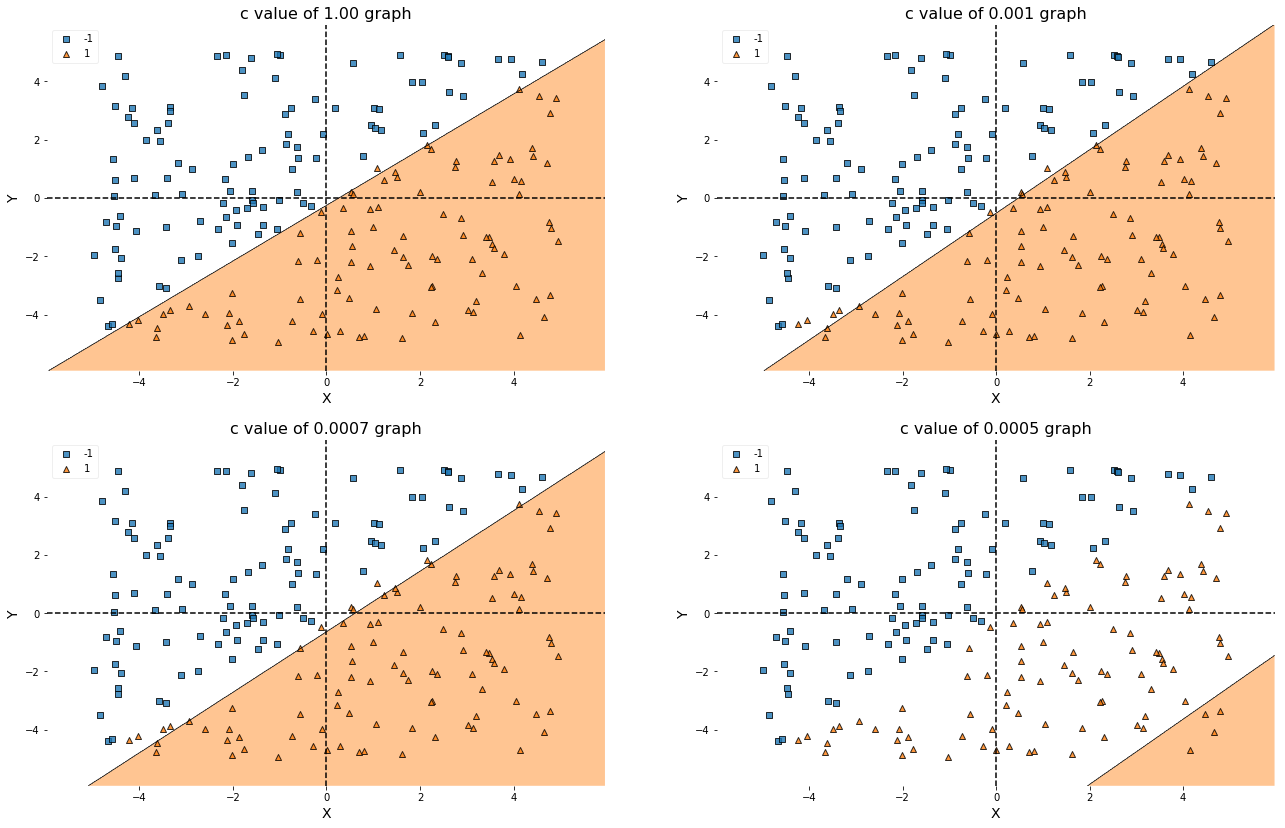

soft margin of 1.00 accuracy: 98.5 %
soft margin of 0.001 accuracy: 94.5 %
soft margin of 0.0007 accuracy: 94.0 %
soft margin of 0.0005 accuracy: 54.0 %


In [53]:
plt.figure(figsize=(22,14))
dims = [2,2]
define_plot(clf_1, X_test, y_test, "c value of 1.00 graph", 1, dims)
define_plot(clf_2, X_test, y_test, "c value of 0.001 graph", 2, dims)
define_plot(clf_3, X_test, y_test, "c value of 0.0007 graph", 3, dims)
define_plot(clf_4, X_test, y_test, "c value of 0.0005 graph", 4, dims)
plt.show()

print("soft margin of 1.00 accuracy: " + str(clf_1.score(X_test.values, y_test.values)*100) + " %")
print("soft margin of 0.001 accuracy: " + str(clf_2.score(X_test.values, y_test.values)*100) + " %")
print("soft margin of 0.0007 accuracy: " + str(clf_3.score(X_test.values, y_test.values)*100) + " %")
print("soft margin of 0.0005 accuracy: " + str(clf_4.score(X_test.values, y_test.values)*100) + " %")

# Testing svm -c softmargin values with rbf kernel

In [54]:
def xor_label(df):
    rtn = []
    for i in range(df.shape[0]):
        if (df['X'][i] >= 0 and df['Y'][i] < 0) or (df['X'][i] < 0 and df['Y'][i] >= 0):
            rtn.append(1)
        else:
            rtn.append(-1)
    return rtn

In [72]:
x_1 = uniform_data(100)
y_1 = uniform_data(100)

x_2 = uniform_data(200)
y_2 = uniform_data(200)

and_df_train = pd.DataFrame({'X': x_1,
                       'Y': y_1})
and_df_train['Label'] = xor_label(and_df_train)

X = and_df_train[['X', 'Y']]
y = and_df_train['Label']


and_df_test = pd.DataFrame({'X': x_2,
                       'Y': y_2})
and_df_test['Label'] = xor_label(and_df_test)

X_test = and_df_test[['X', 'Y']]
y_test = and_df_test['Label']


In [73]:
clf_1 = svm.SVC(kernel='rbf', C = 1.0, gamma="auto")
clf_2 = svm.SVC(kernel='rbf', C = 0.7, gamma="auto")
clf_3 = svm.SVC(kernel='rbf', C = 0.4, gamma="auto")
clf_4 = svm.SVC(kernel='rbf', C = 0.1, gamma="auto")

In [74]:
scores_1 = cross_val_score(clf_1, X.values, y.values, cv=5)
scores_2 = cross_val_score(clf_2, X.values, y.values, cv=5)
scores_3 = cross_val_score(clf_3, X.values, y.values, cv=5)
scores_4 = cross_val_score(clf_4, X.values, y.values, cv=5)
print(scores_1)
print("svm-c rbf soft margin value of 1.00 cross validation mean, 95% confidence interval")
print("rbf c-soft margin value of 1.0: %0.2f, (+/- %0.2f)" % (scores_1.mean(), scores_1.std() * 2)) 
print("rbf c-soft margin value of 0.8: %0.2f, (+/- %0.2f)" % (scores_2.mean(), scores_2.std() * 2)) 
print("rbf c-soft margin value of 0.6: %0.2f, (+/- %0.2f)" % (scores_3.mean(), scores_3.std() * 2)) 
print("rbf c-soft margin value of 0.4: %0.2f, (+/- %0.2f)" % (scores_4.mean(), scores_4.std() * 2)) 

[1.         0.9047619  0.7        0.78947368 0.89473684]
svm-c rbf soft margin value of 1.00 cross validation mean, 95% confidence interval
rbf c-soft margin value of 1.0: 0.86, (+/- 0.21)
rbf c-soft margin value of 0.8: 0.87, (+/- 0.20)
rbf c-soft margin value of 0.6: 0.89, (+/- 0.19)
rbf c-soft margin value of 0.4: 0.53, (+/- 0.02)


In [75]:
clf_1.fit(X.values, y.values)
clf_2.fit(X.values, y.values)
clf_3.fit(X.values, y.values)
clf_4.fit(X.values, y.values)


SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

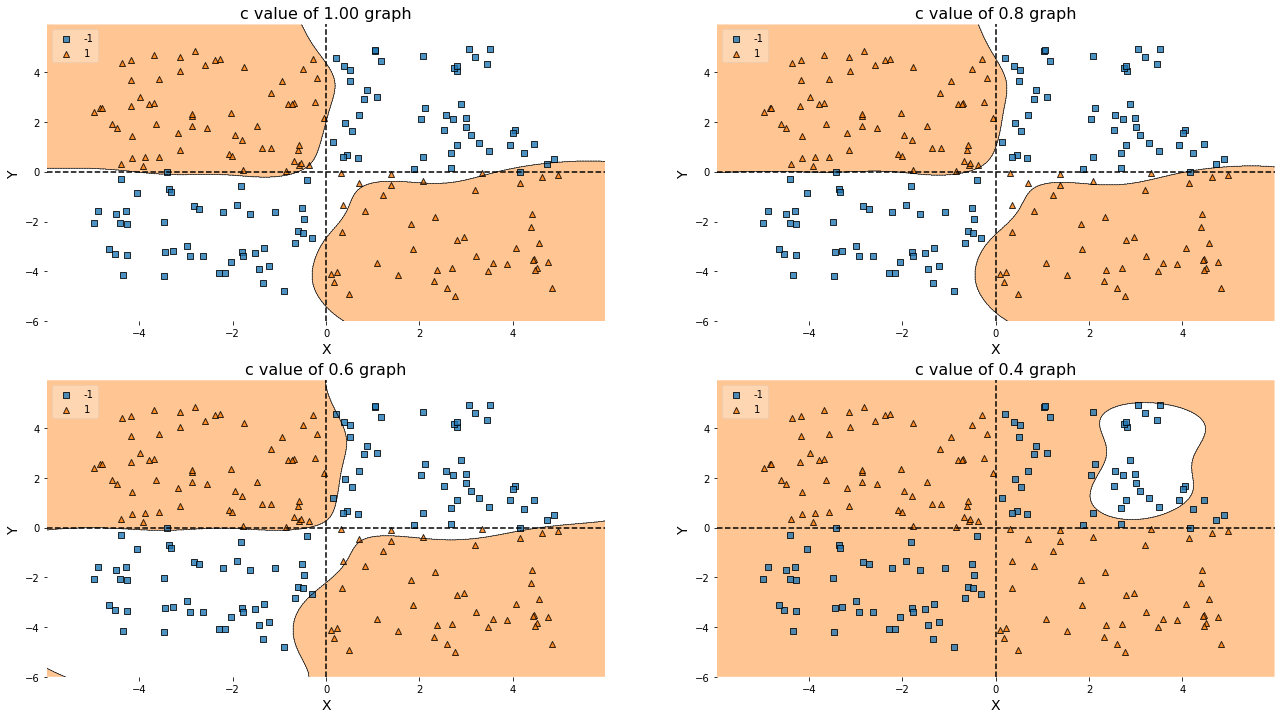

soft margin of 1.00 accuracy: 95.5 %
soft margin of 0.8 accuracy: 96.5 %
soft margin of 0.6 accuracy: 95.5 %
soft margin of 0.4 accuracy: 62.5 %


In [76]:
plt.figure(figsize=(22,12))
dims = [2,2]
define_plot(clf_1, X_test, y_test, "c value of 1.00 graph", 1, dims)
define_plot(clf_2, X_test, y_test, "c value of 0.8 graph", 2, dims)
define_plot(clf_3, X_test, y_test, "c value of 0.6 graph", 3, dims)
define_plot(clf_4, X_test, y_test, "c value of 0.4 graph", 4, dims)
plt.show()

print("soft margin of 1.00 accuracy: " + str(clf_1.score(X_test.values, y_test.values)*100) + " %")
print("soft margin of 0.8 accuracy: " + str(clf_2.score(X_test.values, y_test.values)*100) + " %")
print("soft margin of 0.6 accuracy: " + str(clf_3.score(X_test.values, y_test.values)*100) + " %")
print("soft margin of 0.4 accuracy: " + str(clf_4.score(X_test.values, y_test.values)*100) + " %")

# Using cross validation to test which kernel types are best for specific data sets

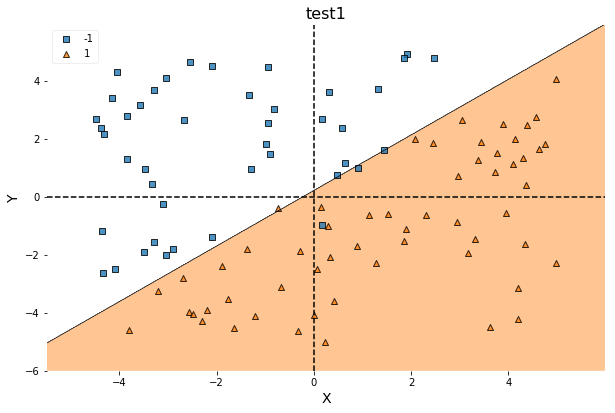

In [18]:
x_1 = uniform_data(100)
y_1 = uniform_data(100)

x_2 = uniform_data(200)
y_2 = uniform_data(200)

and_df_train = pd.DataFrame({'X': x_1,
                       'Y': y_1})
and_df_train['Label'] = and_label_with_noise(and_df_train)

X = and_df_train[['X', 'Y']]
y = and_df_train['Label']


and_df_test = pd.DataFrame({'X': x_2,
                       'Y': y_2})
and_df_test['Label'] = and_label(and_df_test)

X_test = and_df_test[['X', 'Y']]
y_test = and_df_test['Label']

clf = svm.SVC(kernel='linear', C = 1.0)
clf.fit(X.values, y.values)
plt.figure(figsize=(22,14))
dims = [2,2]
define_plot(clf, X, y, "test1", 1, dims)

In [19]:
clf_1 = svm.SVC(kernel='linear', C = 1.0)
clf_2 = svm.SVC(kernel='poly', degree=2, gamma="auto")
clf_3 = svm.SVC(kernel='poly', degree=5, gamma="auto")
#clf_4 = svm.SVC(kernel='poly', degree=10, gamma="auto")
clf_5 = svm.SVC(kernel='rbf', C = 1.0, gamma="auto")
clf_6 = svm.SVC(kernel='sigmoid', C = 1.0, gamma="auto")


In [20]:
scores_1 = cross_val_score(clf_1, X.values, y.values, cv=5)
scores_2 = cross_val_score(clf_2, X.values, y.values, cv=5)
scores_3 = cross_val_score(clf_3, X.values, y.values, cv=5)
#scores_4 = cross_val_score(clf_4, X.values, y.values, cv=5)
scores_5 = cross_val_score(clf_5, X.values, y.values, cv=5)
scores_6 = cross_val_score(clf_6, X.values, y.values, cv=5)

print("cross validation mean, 95% confidence interval")
print("linear kernel: %0.2f, (+/- %0.2f)" % (scores_1.mean(), scores_1.std() * 2)) 
print("polynomial kernel deg=2: %0.2f, (+/- %0.2f)" % (scores_2.mean(), scores_2.std() * 2)) 
print("polynomial kernel deg=5: %0.2f, (+/- %0.2f)" % (scores_3.mean(), scores_3.std() * 2)) 
#print("polynomial kernel deg=10: %0.2f, (+/- %0.2f)" % (scores_4.mean(), scores_4.std() * 2)) 
print("rbf kernel: %0.2f, (+/- %0.2f)" % (scores_5.mean(), scores_5.std() * 2)) 
print("sigmoid kernel: %0.2f, (+/- %0.2f)" % (scores_6.mean(), scores_6.std() * 2)) 

cross validation mean, 95% confidence interval
linear kernel: 0.95, (+/- 0.07)
polynomial kernel deg=2: 0.63, (+/- 0.15)
polynomial kernel deg=5: 0.91, (+/- 0.11)
rbf kernel: 0.98, (+/- 0.05)
sigmoid kernel: 0.78, (+/- 0.05)


In [21]:
clf_1.fit(X.values, y.values)
clf_2.fit(X.values, y.values)
clf_3.fit(X.values, y.values)
#clf_4.fit(X.values, y.values)
clf_5.fit(X.values, y.values)
clf_6.fit(X.values, y.values)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

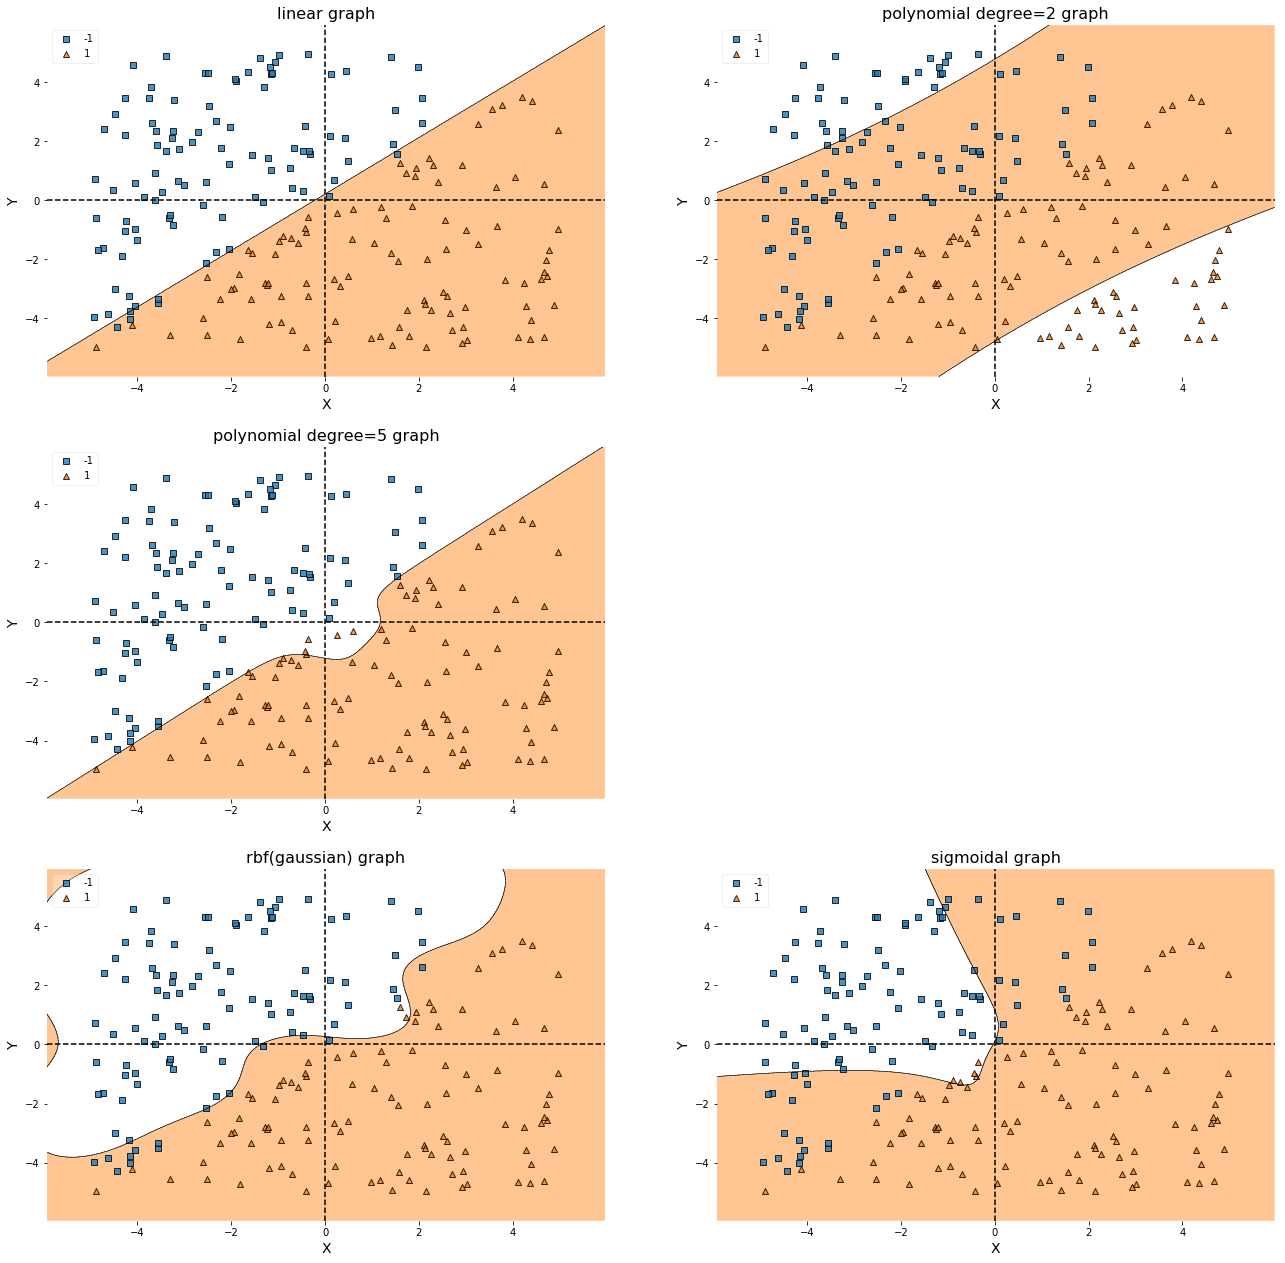

linear accuracy: 96.5 %
polynomial degree=2 accuracy: 48.5 %
polynomial degree=5 accuracy: 97.0 %
rbf accuracy: 93.5 %
sigmoidal accuracy: 79.5 %


In [22]:
plt.figure(figsize=(22,22))
dims = [3,2]
define_plot(clf_1, X_test, y_test, "linear graph", 1, dims)
define_plot(clf_2, X_test, y_test, "polynomial degree=2 graph", 2, dims)
define_plot(clf_3, X_test, y_test, "polynomial degree=5 graph", 3, dims)
#define_plot(clf_4, X_test, y_test, "polynomial degree=10 graph", 4, dims)
define_plot(clf_5, X_test, y_test, "rbf(gaussian) graph", 5, dims)
define_plot(clf_6, X_test, y_test, "sigmoidal graph", 6, dims)
plt.show()

print("linear accuracy: " + str(clf_1.score(X_test.values, y_test.values)*100) + " %")
print("polynomial degree=2 accuracy: " + str(clf_2.score(X_test.values, y_test.values)*100) + " %")
print("polynomial degree=5 accuracy: " + str(clf_3.score(X_test.values, y_test.values)*100) + " %")
#print("polynomial degree=10 accuracy: " + str(clf_4.score(X_test.values, y_test.values)*100) + " %")
print("rbf accuracy: " + str(clf_5.score(X_test.values, y_test.values)*100) + " %")
print("sigmoidal accuracy: " + str(clf_6.score(X_test.values, y_test.values)*100) + " %")

### 